In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from fsmodels import SklSingleExpFrequencyScan

# sklearn-compatible class

In [2]:
frequency_powers = np.linspace(0, 3.5, 1000)
frequency_powers = tf.Variable(frequency_powers, dtype='float64').numpy()

In [3]:
fs = SklSingleExpFrequencyScan(filling_pulse=20*10**-6)

fs.exps_params_ = [-2.3, 3.5]
fs.p_coef_ = 0.2

experimental_dlts = fs.predict(frequency_powers) 
experimental_dlts += np.random.normal(loc=0, scale=0.2, size=experimental_dlts.shape[0])

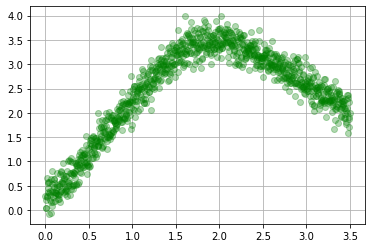

In [4]:
plt.plot(frequency_powers, experimental_dlts, 'og', alpha=0.3)
plt.grid()
plt.show()

In [5]:
fs = SklSingleExpFrequencyScan(filling_pulse=2*10**-6,
                               fit_p_coef = True,
                               learning_rate=0.05,
                               n_iters=200,
                               stop_val=10**-5,
                               verbose=False
                              )

fs.fit(X=frequency_powers, y=experimental_dlts)

SklSingleExpFrequencyScan(filling_pulse=2e-06, learning_rate=0.05, n_iters=200,
                          stop_val=1e-05)

In [6]:
fit_results = fs.fit_results_
fit_results

,n_exps,filling_pulse,loss,amplitude,time_constant_power,p_coef
0,1,0.000002,1.974891,3.5,-2.554707,1.0
1,1,0.000002,1.691882,3.524691,-2.475963,0.913495
2,1,0.000002,1.410718,3.550286,-2.411569,0.817657
3,1,0.000002,1.116313,3.575983,-2.359329,0.712303
4,1,0.000002,0.80077,3.600897,-2.316885,0.597788
...,...,...,...,...,...,...
70,1,0.000002,0.039181,3.517832,-2.282502,0.207157
71,1,0.000002,0.03917,3.517078,-2.282612,0.20704
72,1,0.000002,0.039159,3.516347,-2.282719,0.206926
73,1,0.000002,0.039148,3.515638,-2.282823,0.206816


In [7]:
fs.exps_params_

array([-2.28302188,  3.51428167])

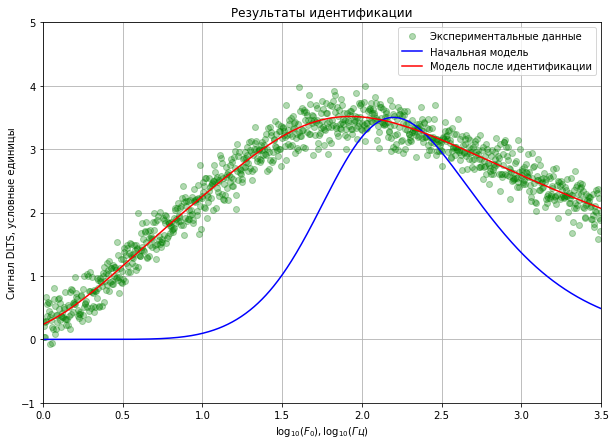

In [8]:
def plot_ident_res(frequency_powers,
                   experimental_dlts, 
                   fit_results
                  ):
    
    indices = frequency_powers.argsort()
    frequency_powers = frequency_powers[indices]
    experimental_dlts = experimental_dlts[indices]
    
    init_params = fit_results.iloc[0, :]
    init_exps_params = [init_params.time_constant_power, init_params.amplitude]
    init_p_coef = init_params.p_coef
    
    
    fs = SklSingleExpFrequencyScan(filling_pulse = fit_results.filling_pulse[0])
    
    fs.exps_params_ = init_exps_params
    fs.p_coef_ = init_p_coef
    initial_model = fs.predict(frequency_powers)
    
    
    final_params = fit_results.iloc[-1, :]
    final_exps_params = [final_params.time_constant_power, final_params.amplitude]
    final_p_coef = final_params.p_coef
    
    fs.exps_params_=final_exps_params
    fs.p_coef_ = final_p_coef
    final_model = fs.predict(frequency_powers)
    

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))

    ax.plot(frequency_powers, experimental_dlts, 'og', alpha=0.3, label='Экспериментальные данные')

    ax.plot(frequency_powers, initial_model, '-b', label='Начальная модель')

    ax.plot(frequency_powers, final_model, '-r', label='Модель после идентификации')

    ax.legend()
    ax.grid()
    ax.set_xlim([0, 3.5])
    ylim = ax.get_ylim()
    ylim = [np.floor(ylim[0]), np.ceil(ylim[1])]
    ax.set_ylim(ylim)
    
    ax.set_title('Результаты идентификации')
    ax.set_xlabel(r'$\log_{10}(F_0), \log_{10}(Гц)$')
    ax.set_ylabel('Сигнал DLTS, условные единицы')
    
    return fig, ax



fig, ax = plot_ident_res(frequency_powers,
                         experimental_dlts, 
                         fit_results
                        )

plt.show()

In [9]:
fs.get_params()

{'filling_pulse': 2e-06,
 'fit_p_coef': True,
 'learning_rate': 0.05,
 'n_iters': 200,
 'stop_val': 1e-05,
 'verbose': False}

In [10]:
fs.set_params(fit_p_coef=False)

SklSingleExpFrequencyScan(filling_pulse=2e-06, fit_p_coef=False,
                          learning_rate=0.05, n_iters=200, stop_val=1e-05)

In [11]:
fs.get_params()

{'filling_pulse': 2e-06,
 'fit_p_coef': False,
 'learning_rate': 0.05,
 'n_iters': 200,
 'stop_val': 1e-05,
 'verbose': False}

In [12]:
fs.score(X=frequency_powers, y=experimental_dlts)

0.956599195346842

In [13]:
fs.predict(X=frequency_powers)

array([0.23546557, 0.23964465, 0.24386669, 0.24813161, 0.25243934,
       0.25678978, 0.26118283, 0.26561839, 0.27009634, 0.27461658,
       0.27917897, 0.28378339, 0.2884297 , 0.29311776, 0.29784742,
       0.30261852, 0.30743092, 0.31228443, 0.3171789 , 0.32211414,
       0.32708998, 0.33210621, 0.33716266, 0.34225913, 0.34739541,
       0.35257129, 0.35778656, 0.363041  , 0.3683344 , 0.37366652,
       0.37903713, 0.384446  , 0.38989289, 0.39537754, 0.40089973,
       0.40645918, 0.41205565, 0.41768888, 0.42335859, 0.42906454,
       0.43480643, 0.44058401, 0.44639698, 0.45224508, 0.45812802,
       0.46404551, 0.46999726, 0.47598298, 0.48200237, 0.48805514,
       0.49414099, 0.50025962, 0.50641071, 0.51259397, 0.51880908,
       0.52505573, 0.53133362, 0.53764242, 0.54398183, 0.55035151,
       0.55675116, 0.56318045, 0.56963907, 0.57612668, 0.58264297,
       0.5891876 , 0.59576026, 0.60236061, 0.60898832, 0.61564308,
       0.62232455, 0.62903239, 0.63576628, 0.6425259 , 0.64931

# K-fold Cross-Validation and hyperparameter tuning

## Подготовка данных

In [14]:
X_train, X_test, y_train, y_test = train_test_split(frequency_powers, experimental_dlts, test_size=0.2)

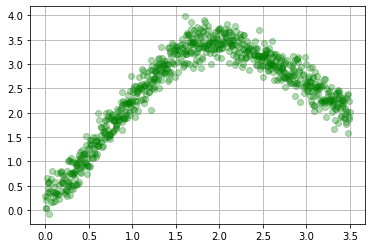

In [15]:
plt.plot(X_train, y_train, 'og', alpha=0.3)
plt.grid()
plt.show()

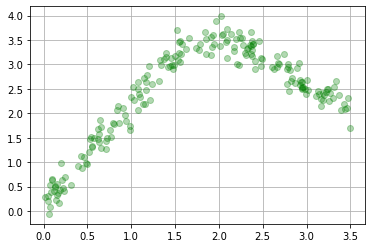

In [16]:
plt.plot(X_test, y_test, 'og', alpha=0.3)
plt.grid()
plt.show()

## fit_p_coef=False

In [17]:
fs = SklSingleExpFrequencyScan(filling_pulse=2*10**-5,
                               fit_p_coef=False,
                               learning_rate=0.05,
                               n_iters=200,
                               stop_val=10**-5,
                               verbose=False
                              )

fs.fit(X=X_train, y=y_train)

SklSingleExpFrequencyScan(filling_pulse=2e-05, fit_p_coef=False,
                          learning_rate=0.05, n_iters=200, stop_val=1e-05)

In [18]:
def display_scores(scores):
    print(f'Scores: {scores}')
    print(f'Mean: {scores.mean()}')
    print(f'Standard deviation: {scores.std()}')

scores = cross_val_score(fs, X_train, y_train, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)

display_scores(np.sqrt(-scores))

Scores: [1.24478129 1.26406752 1.1925953  1.17692234 1.2008985  1.18618301
 1.11887216 1.24080998 1.19785554 1.28390753]
Mean: 1.2106893161660741
Standard deviation: 0.0458680441337838


In [19]:
fs.fit_results_

,n_exps,filling_pulse,loss,amplitude,time_constant_power,p_coef
0,1,0.00002,1.959225,3.5,-2.510933,1.0
1,1,0.00002,1.85548,3.52591,-2.438864,1.0
2,1,0.00002,1.790762,3.552106,-2.384469,1.0
3,1,0.00002,1.749075,3.5781,-2.343864,1.0
4,1,0.00002,1.720683,3.603643,-2.313735,1.0
...,...,...,...,...,...,...
137,1,0.00002,1.462416,4.538925,-2.242501,1.0
138,1,0.00002,1.462404,4.539693,-2.242513,1.0
139,1,0.00002,1.462393,4.540442,-2.242525,1.0
140,1,0.00002,1.462382,4.541172,-2.242537,1.0


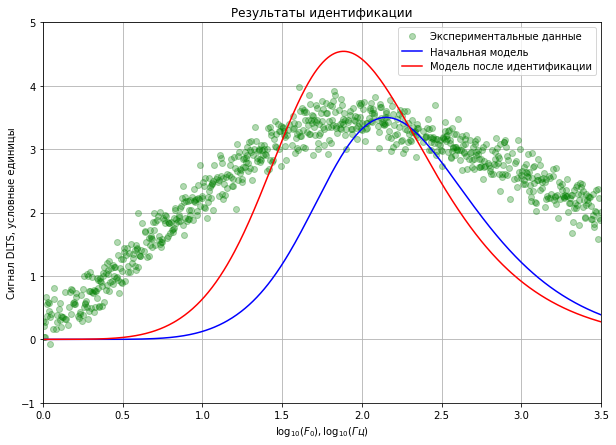

In [20]:
fit_results = fs.fit_results_

fig, ax = plot_ident_res(X_train,
                         y_train, 
                         fit_results
                        )

plt.show()

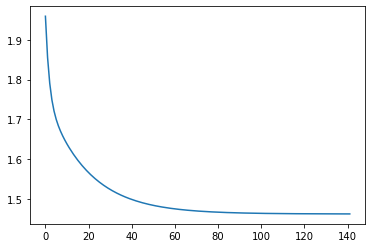

In [21]:
plt.plot(fit_results.loss)
plt.show()

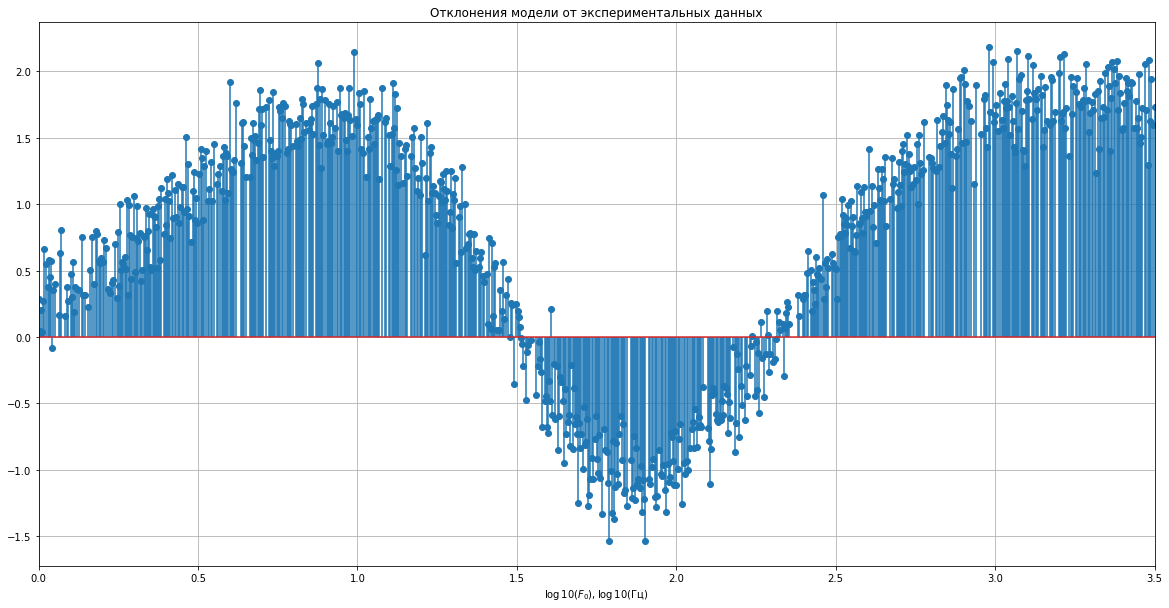

In [22]:
plt.figure(figsize=(20,10))
plt.stem(X_train, (y_train - fs.predict(X_train)))
plt.grid()
plt.title('Oтклонения модели от экспериментальных данных')
plt.xlabel(r'$\log10(F_0), \log10($Гц$)$')
plt.xlim(0, 3.5)
plt.show()

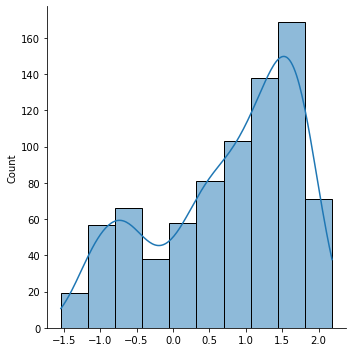

In [23]:
sns.displot(x=y_train - fs.predict(X_train), bins=10, kde=True)
plt.show()

## fit_p_coef=True

In [24]:
fs = SklSingleExpFrequencyScan(filling_pulse=2*10**-5,
                               fit_p_coef=True,
                               learning_rate=0.05,
                               n_iters=200,
                               stop_val=10**-5,
                               verbose=False
                              )

fs.fit(X=X_train, y=y_train)

SklSingleExpFrequencyScan(filling_pulse=2e-05, learning_rate=0.05, n_iters=200,
                          stop_val=1e-05)

In [25]:
def display_scores(scores):
    print(f'Scores: {scores}')
    print(f'Mean: {scores.mean()}')
    print(f'Standard deviation: {scores.std()}')

scores = cross_val_score(fs, X_train, y_train, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)

display_scores(np.sqrt(-scores))

Scores: [0.20019025 0.22608144 0.19933671 0.21394836 0.16855935 0.1886625
 0.22096358 0.19256361 0.18826337 0.18309042]
Mean: 0.19816596079205778
Standard deviation: 0.016962149092982375


In [26]:
fs.fit_results_

,n_exps,filling_pulse,loss,amplitude,time_constant_power,p_coef
0,1,0.00002,3.600188,3.5,-1.380089,1.0
1,1,0.00002,2.677898,3.501289,-1.580547,0.908966
2,1,0.00002,1.936546,3.513156,-1.747476,0.802539
3,1,0.00002,1.34037,3.531693,-1.876035,0.682485
4,1,0.00002,0.835552,3.553187,-1.969331,0.55183
...,...,...,...,...,...,...
59,1,0.00002,0.039303,3.51321,-2.288921,0.202717
60,1,0.00002,0.039291,3.512448,-2.289032,0.202601
61,1,0.00002,0.03928,3.51171,-2.28914,0.202489
62,1,0.00002,0.039269,3.510994,-2.289244,0.20238


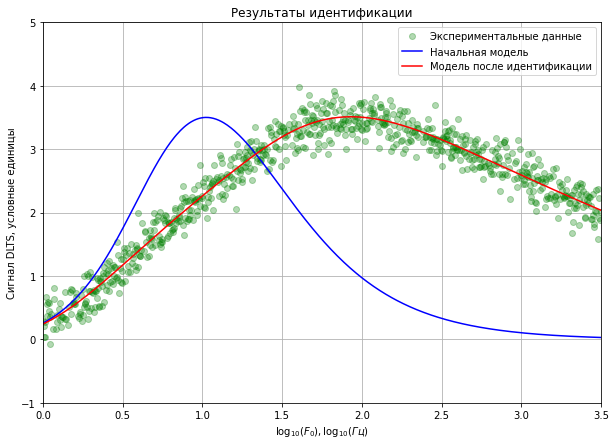

In [27]:
fit_results = fs.fit_results_

fig, ax = plot_ident_res(X_train,
                         y_train, 
                         fit_results
                        )

plt.show()

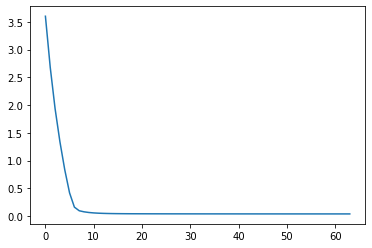

In [28]:
plt.plot(fs.fit_results_.loss)
plt.show()

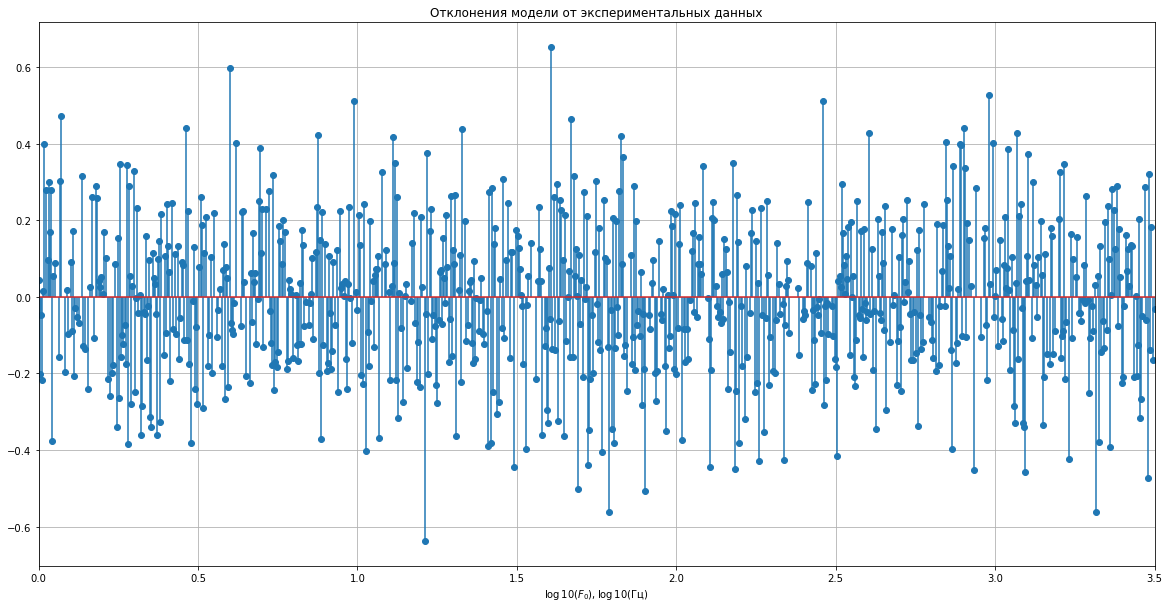

In [29]:
plt.figure(figsize=(20,10))
plt.stem(X_train, (y_train - fs.predict(X_train)))
plt.grid()
plt.title('Oтклонения модели от экспериментальных данных')
plt.xlabel(r'$\log10(F_0), \log10($Гц$)$')
plt.xlim(0, 3.5)
plt.show()

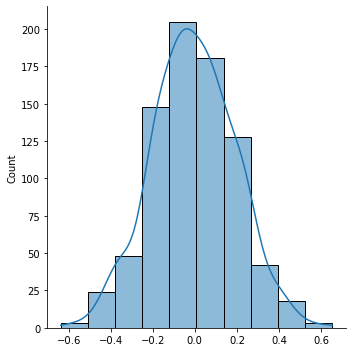

In [30]:
sns.displot(x=y_train - fs.predict(X_train), bins=10, kde=True)
plt.show()

## GridSearchCV

In [31]:
grid_search = GridSearchCV(fs, {'fit_p_coef': [False, True]}, cv=10, scoring='neg_mean_squared_error',
                           return_train_score=True, n_jobs=-1)

In [32]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=SklSingleExpFrequencyScan(filling_pulse=2e-05,
                                                 learning_rate=0.05,
                                                 n_iters=200, stop_val=1e-05),
             n_jobs=-1, param_grid={'fit_p_coef': [False, True]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [33]:
grid_search.best_params_

{'fit_p_coef': True}

In [34]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

1.2115558747868265 {'fit_p_coef': False}
0.19888689298706805 {'fit_p_coef': True}


In [35]:
scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)

display_scores(np.sqrt(-scores))

Scores: [0.20017766 0.2260762  0.19937556 0.2139357  0.16855623 0.18864748
 0.22096993 0.19256766 0.18826768 0.18309729]
Mean: 0.19816714055571766
Standard deviation: 0.016961476112012805


In [36]:
grid_search.best_estimator_.fit_results_

,n_exps,filling_pulse,loss,amplitude,time_constant_power,p_coef
0,1,0.00002,4.004947,3.5,-3.287715,1.0
1,1,0.00002,3.445232,3.501632,-3.130251,0.946678
2,1,0.00002,2.854836,3.5082,-2.971696,0.88195
3,1,0.00002,2.256128,3.520262,-2.816832,0.803268
4,1,0.00002,1.691583,3.537415,-2.674929,0.710367
...,...,...,...,...,...,...
60,1,0.00002,0.039294,3.512632,-2.289026,0.202625
61,1,0.00002,0.039282,3.511888,-2.289131,0.202513
62,1,0.00002,0.039271,3.511166,-2.289233,0.202403
63,1,0.00002,0.039261,3.510466,-2.289333,0.202298


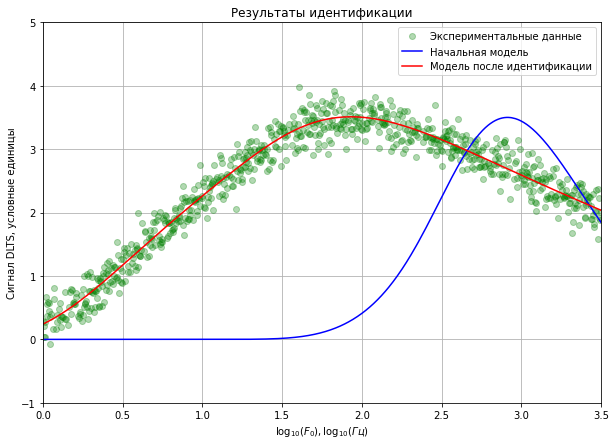

In [37]:
fit_results = grid_search.best_estimator_.fit_results_

fig, ax = plot_ident_res(X_train,
                         y_train, 
                         fit_results
                        )

plt.show()

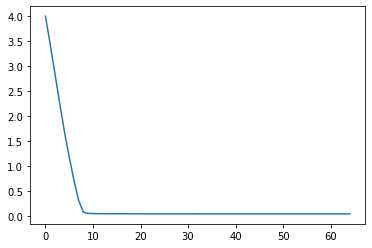

In [38]:
plt.plot(grid_search.best_estimator_.fit_results_.loss)
plt.show()

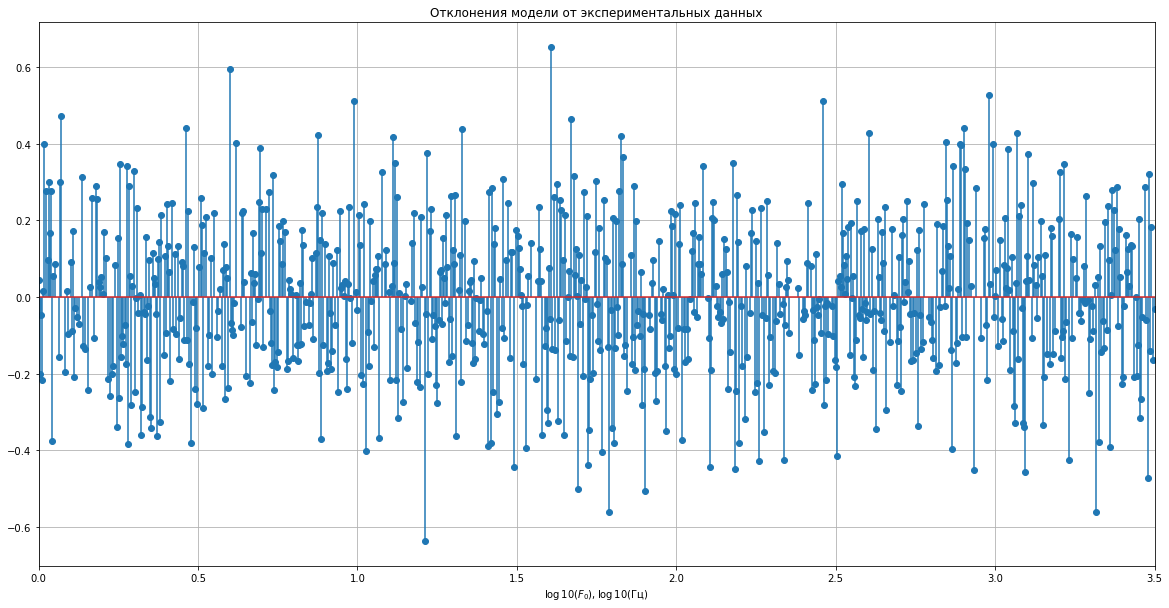

In [39]:
plt.figure(figsize=(20,10))
plt.stem(X_train, (y_train - grid_search.best_estimator_.predict(X_train)))
plt.grid()
plt.title('Oтклонения модели от экспериментальных данных')
plt.xlabel(r'$\log10(F_0), \log10($Гц$)$')
plt.xlim(0, 3.5)
plt.show()

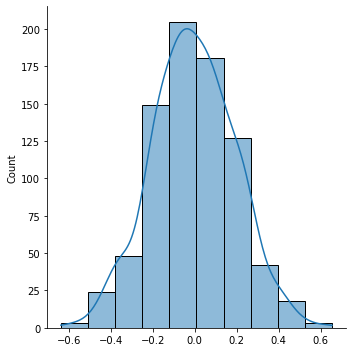

In [40]:
sns.displot(x=y_train - grid_search.best_estimator_.predict(X_train), bins=10, kde=True)
plt.show()

In [41]:
mean_squared_error(y_test, grid_search.best_estimator_.predict(X_test), squared=False)

0.1953837000661899